In [1]:
!pip install ydata-profiling -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from ydata_profiling import ProfileReport

sns.set(style = 'whitegrid')

In [3]:
!git clone 'https://github.com/Chinmaybharadwaj7/Sample-Dataset'

Cloning into 'Sample-Dataset'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 22.33 KiB | 5.58 MiB/s, done.


In [4]:
df = pd.read_csv('/content/Sample-Dataset/Titanic-Dataset.csv')

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

DATA IMPORT - Fetching the raw data from CSV

In [6]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [8]:
#values that the column holds
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

#Describes the dataset(Only numerical Column)
#Calculates the basic statistics for dataset study

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [11]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [12]:
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

DATA CLEANING - Handle Null Values or empty values

Few Statistics :

*   Mode = most frequent value
*   Median = middle value
*   Mean = average value

In [13]:
#first we need to figure the cells which are not filled i.e. Empty
# True if Empty(Null)

df.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [14]:
#total count of unknown value(null) in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#filling the empty column of 'Age' column with Median value of the same column
#Wll use Median for Numerical columns
#Median = Midlle Value of that column
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
#filling the empty column of 'Embarked' column with Mode of the same column
#Wll use Mode for Numerical columns
#Mode = value occured very often i.e. most frequent value

mode_embarked = df['Embarked'].mode()
mode_embarked

0    S
Name: Embarked, dtype: object

In [18]:
mode_embarked = df['Embarked'].mode()[0]
mode_embarked

'S'

In [19]:
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [21]:
#Filling the 'Cabin' column
# Will fill 1 for cells with cabin value given, and 0 for empty

df['Has_Cabin'] = df['Cabin'].notna().astype(int)
#Creating a new column 'Has_cabin' with returned values as boolean. True if has value and False if not.
#astype() -> Converts boolean to int

df.drop('Cabin',axis = 1,inplace = True) #Deleteng the column 'Cabin' which is not required further more

In [22]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

In [23]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Has_Cabin  
0      0         A/5 21171   7.2500        S          0  
1      0          PC 17599  71.2833        C          1  
2      0  STON/O2. 3101282   7.9250        S          0  
3      0            113803  53.1000        S          1  
4      0            373450   8.0500        S          0

In [24]:
df['Has_Cabin'].value_counts()

Has_Cabin
0    687
1    204
Name: count, dtype: int64

DATA ANALYSIS - Analysing the data after cleaning to find the solution

Three types of Analysis:


*   Univariate Analysis - Analysing using Owo columns/factors
*   Bivariate Analysis - Analysing using Two columns/factors
*   Multivariate Analysis - Analysing using Two or more columns/factors






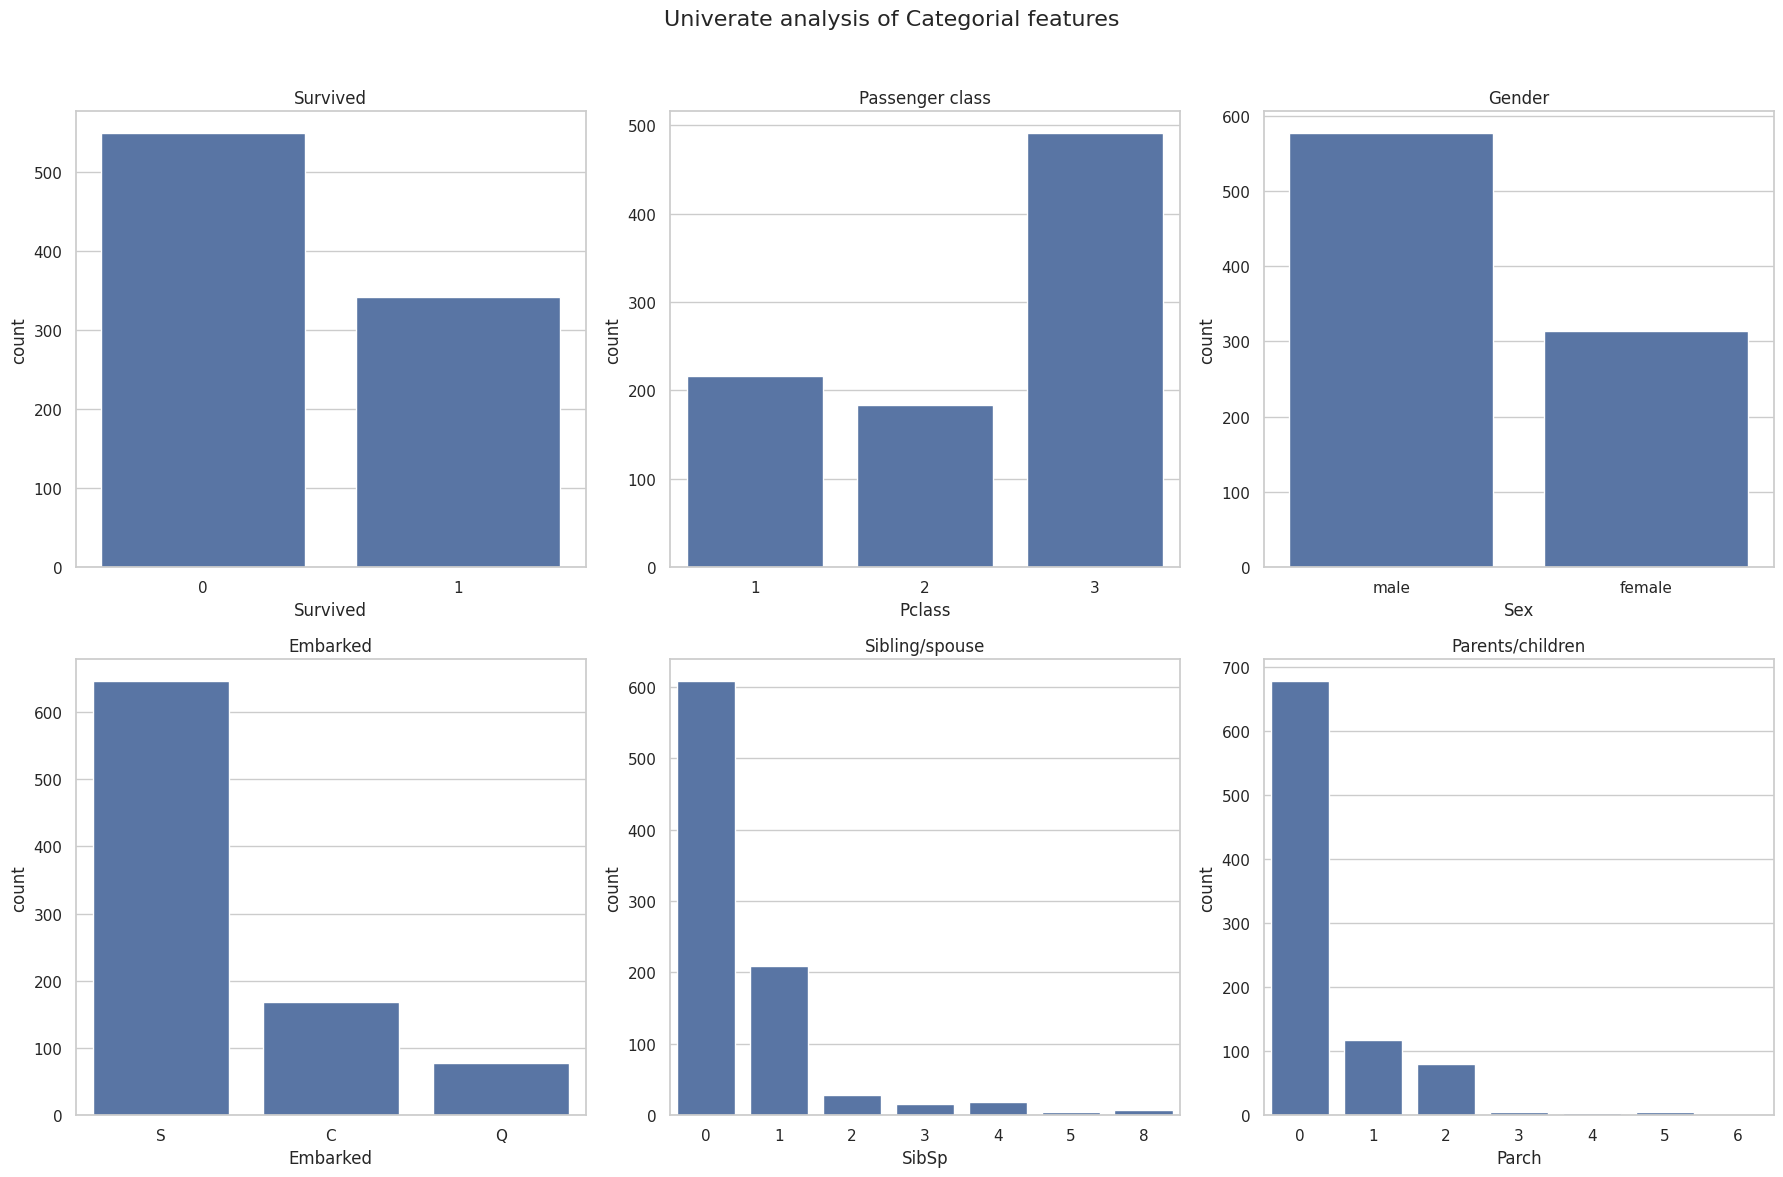

In [25]:
##Setup up the figure for plotting
fig, axes = plt.subplots(2,3,figsize = (18,12))
fig.suptitle('Univerate analysis of Categorial features',fontsize = 16)

#plotting the each categorical column
sns.countplot(ax=axes[0,0],x = 'Survived', data = df).set_title('Survived')
sns.countplot(ax=axes[0,1],x = 'Pclass', data = df).set_title('Passenger class')
sns.countplot(ax=axes[0,2],x = 'Sex', data = df).set_title('Gender')
sns.countplot(ax=axes[1,0],x = 'Embarked', data = df).set_title('Embarked')
sns.countplot(ax=axes[1,1],x = 'SibSp', data = df).set_title('Sibling/spouse')
sns.countplot(ax=axes[1,2],x = 'Parch', data = df).set_title('Parents/children')

plt.tight_layout(rect =[0,0,1,0.96])
plt.show()

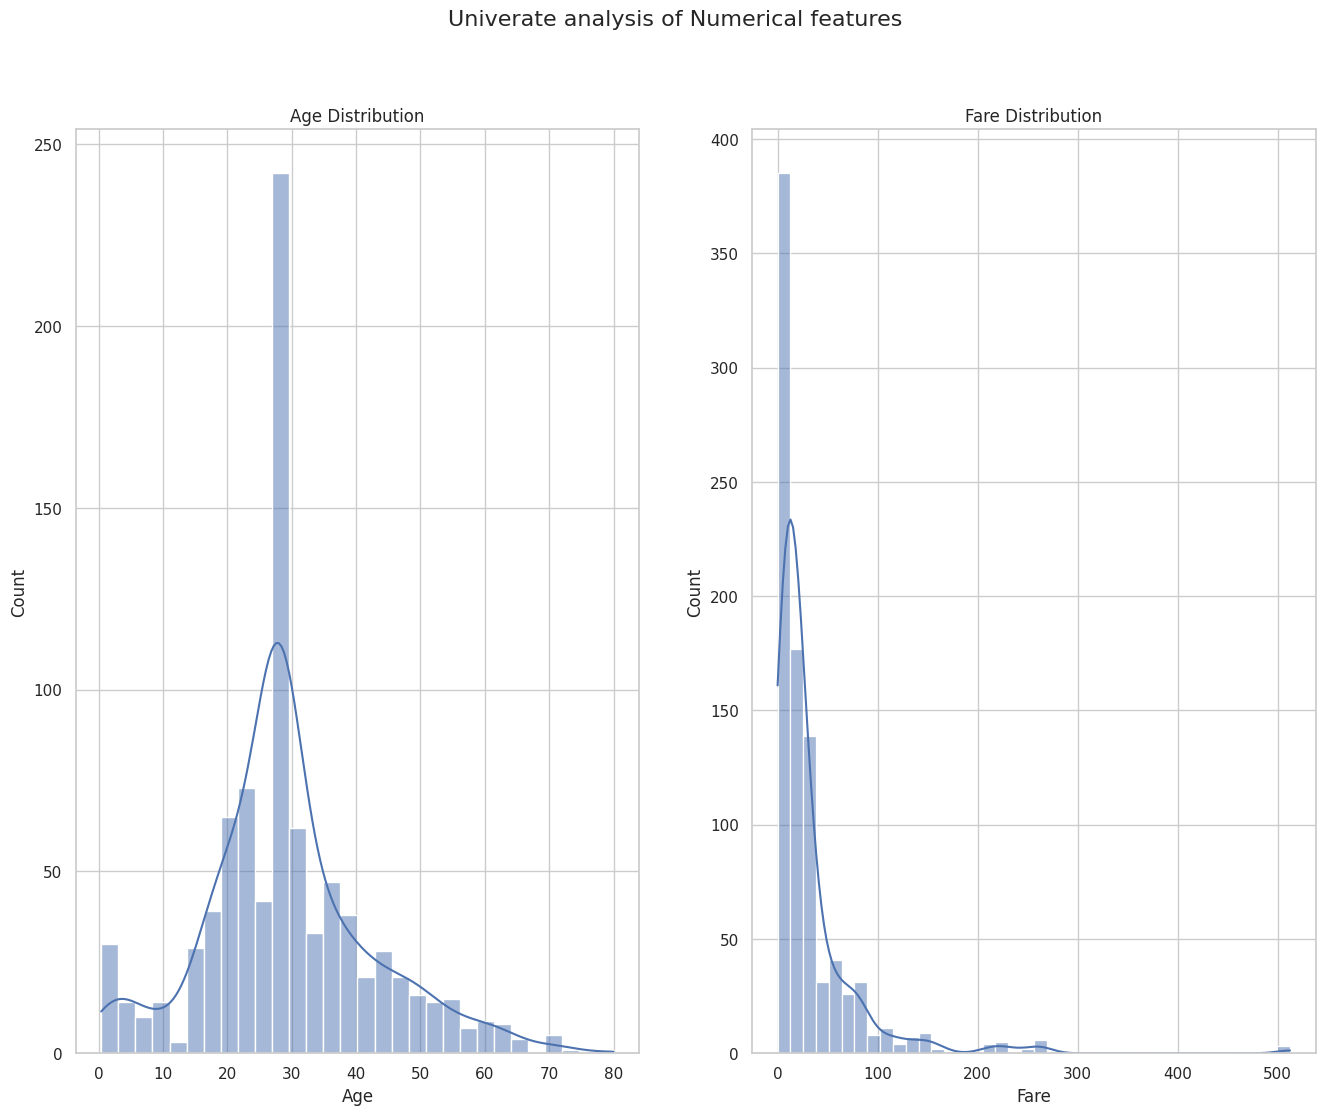

In [26]:
fig, axes = plt.subplots(1,2,figsize = (16,12))
fig.suptitle('Univerate analysis of Numerical features',fontsize = 16)

sns.histplot(ax = axes[0],data = df, x ='Age',kde = True, bins =30).set_title('Age Distribution')
sns.histplot(ax = axes[1],data = df, x ='Fare',kde = True, bins =40).set_title('Fare Distribution')

plt.show()

In Bivariate Analysis
*   For Categorial vs Numerical -> Barchart
*   For Categorical vs Categorical -> Stacked bars(crosstabs)
*   For Numerical vs Numerical -> Scatterplot







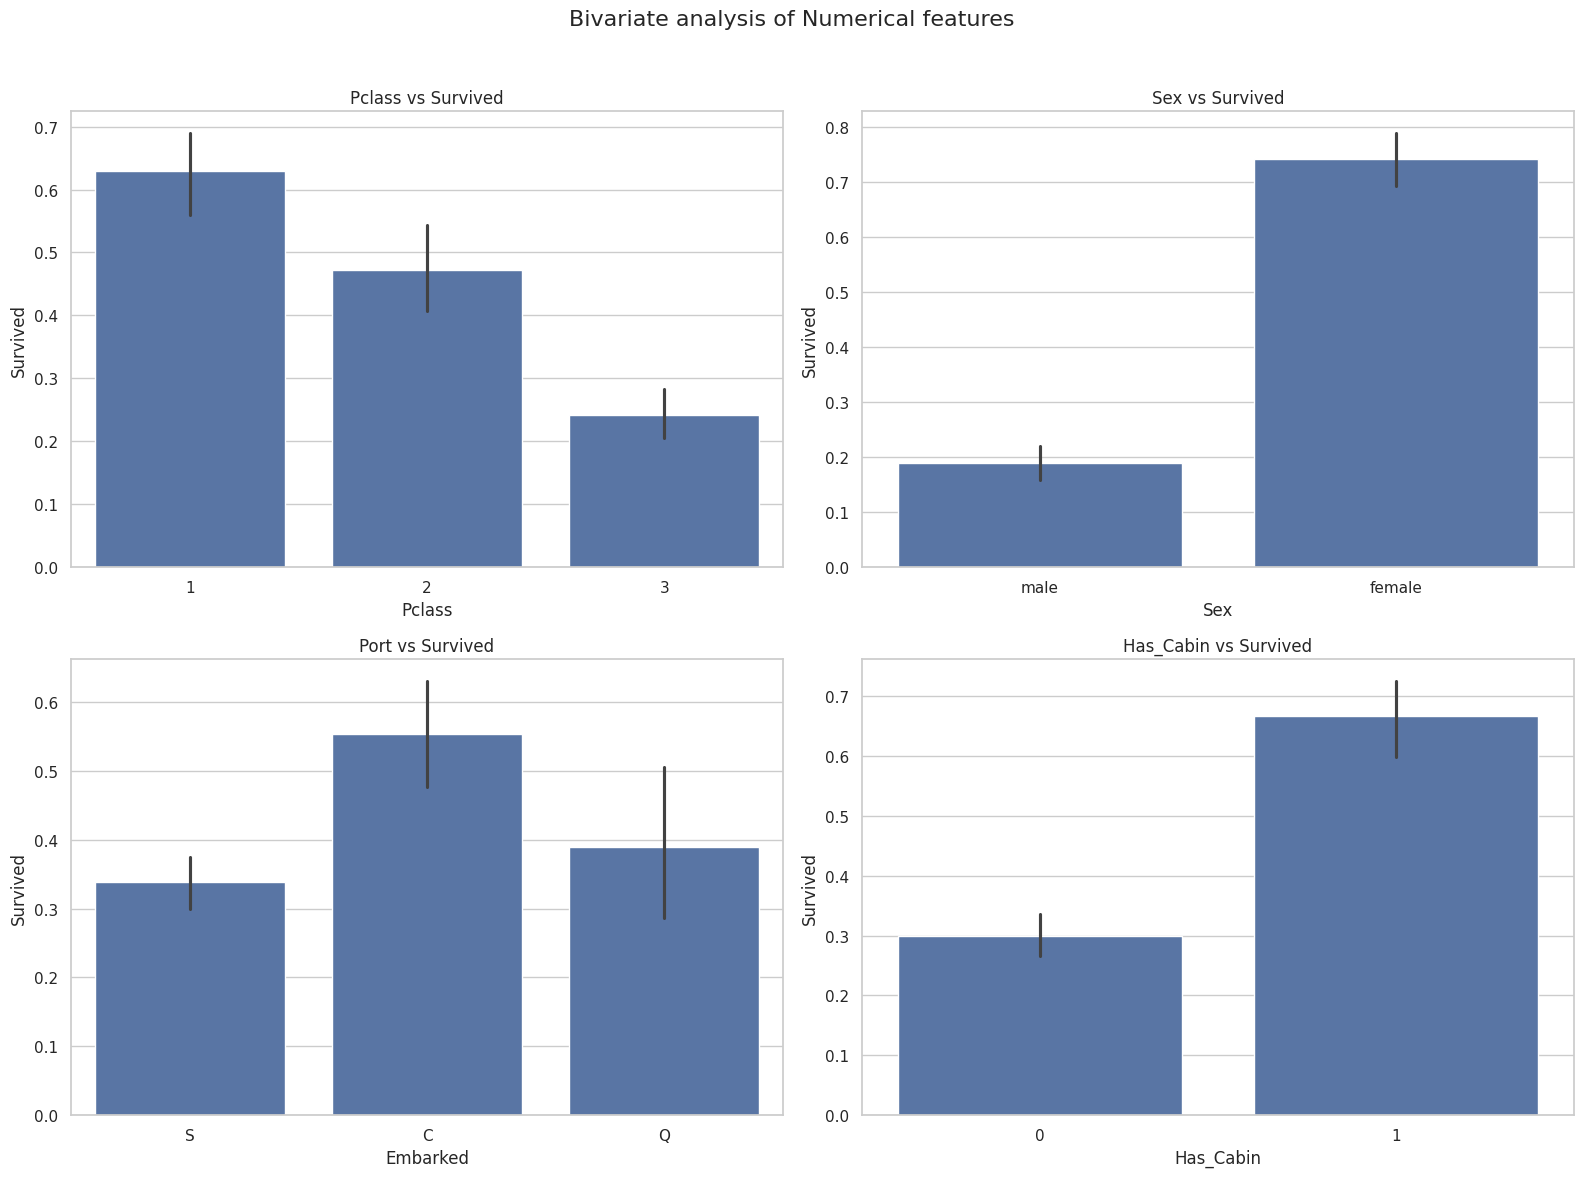

In [27]:
fig, axes = plt.subplots(2,2,figsize = (16,12))
fig.suptitle('Bivariate analysis of Numerical features',fontsize = 16)

#Pclass vs Survived
sns.barplot(ax= axes[0,0], x = 'Pclass', y ='Survived', data = df).set_title('Pclass vs Survived')

#Sex vs Survived
sns.barplot(ax= axes[0,1], x = 'Sex', y ='Survived', data = df).set_title('Sex vs Survived')

#Embarked vs Survived
sns.barplot(ax= axes[1,0], x = 'Embarked', y ='Survived', data = df).set_title('Port vs Survived')

#Has_cabin vs Survived
sns.barplot(ax= axes[1,1], x = 'Has_Cabin', y ='Survived', data = df).set_title('Has_Cabin vs Survived')

plt.tight_layout(rect = [0,0,1,0.96])
plt.show()

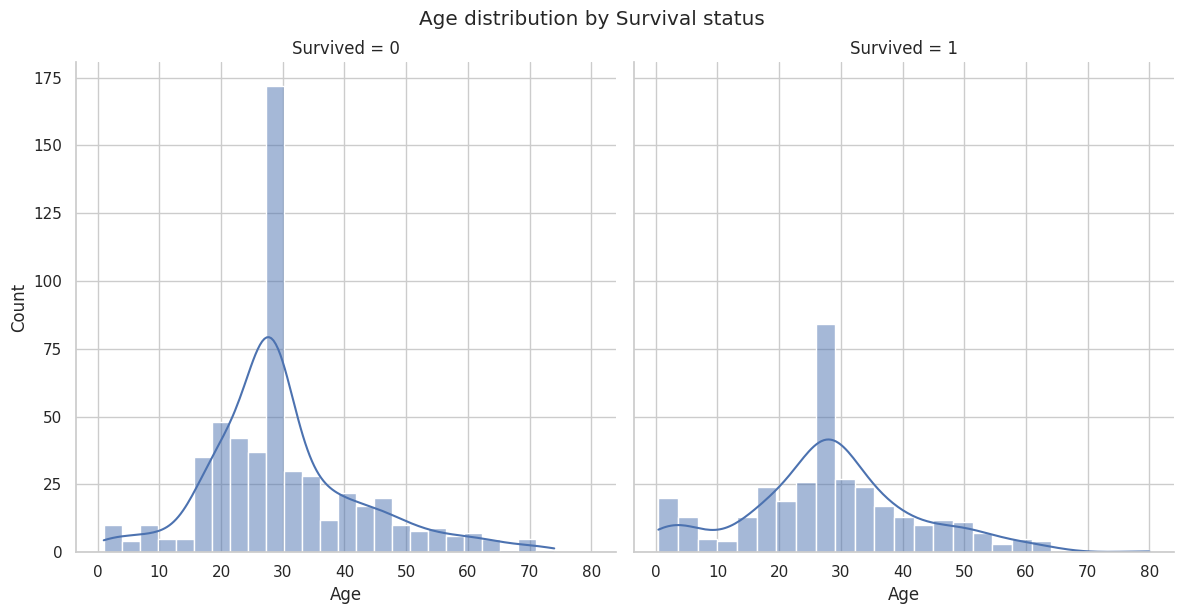

In [28]:
#Age vs Survived

g =sns.FacetGrid(df, col= 'Survived', height = 6)
g.map(sns.histplot,'Age',bins = 25, kde = True)
plt.suptitle('Age distribution by Survival status', y = 1.02)
plt.show()


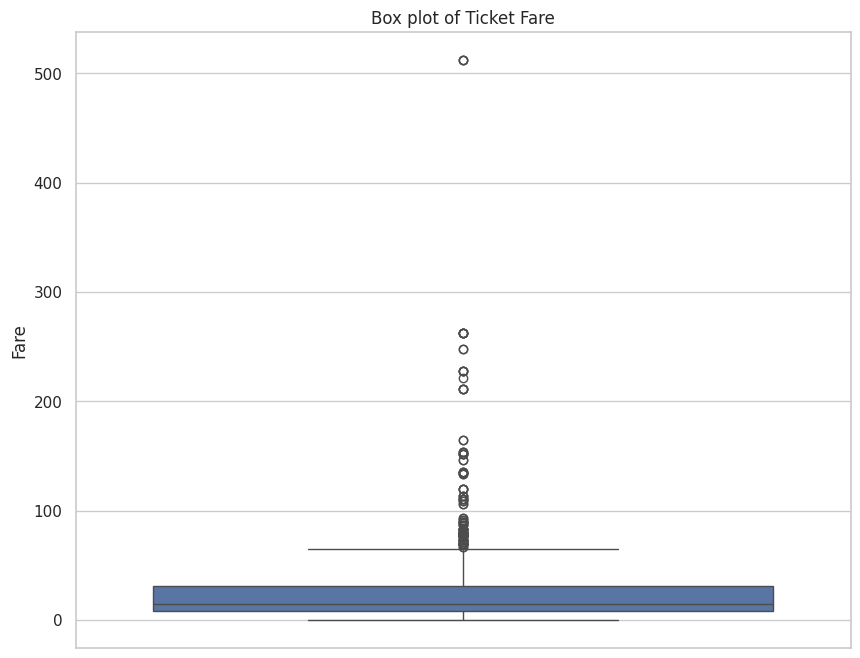

In [29]:
plt.figure(figsize=(10,8))
sns.boxplot(y = 'Fare',data=df)
plt.title('Box plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

FEATURE ENGINEERING

In [30]:
#1 create a 'FamilySize' feature
df['FamilySize'] = df['SibSp']+df['Parch']+1 #+1 is for person themselves

In [31]:
#2 creating a 'IsAlone' feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1,'IsAlone'] = 1

print("Created 'FamilySize' and 'IsAlone' features :")
df[['FamilySize','IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features :


FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1

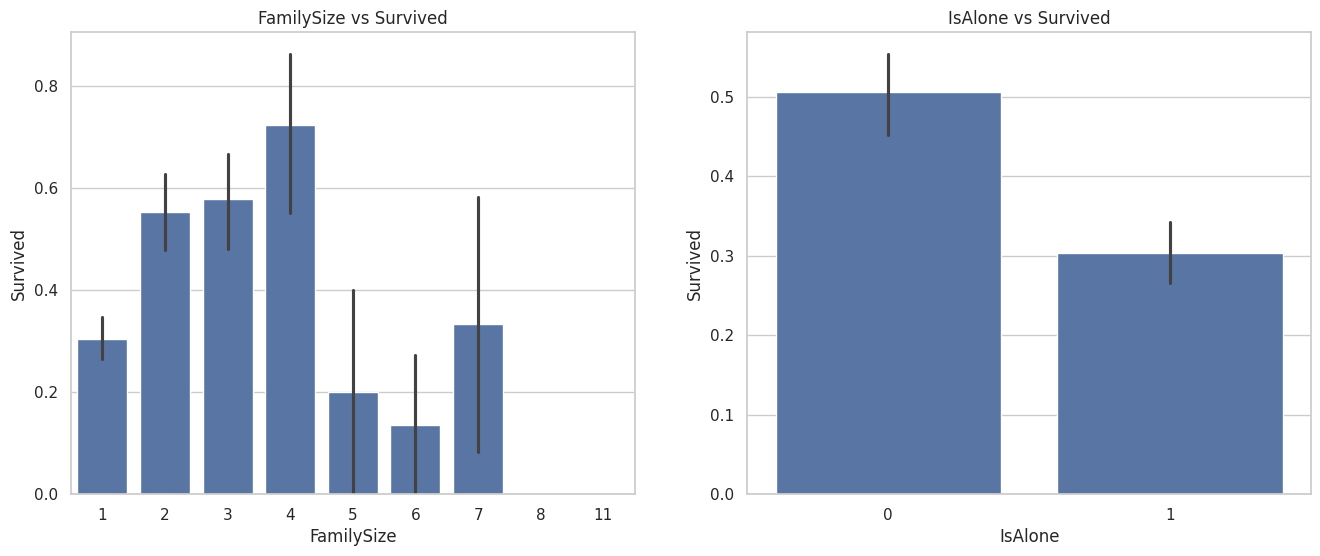

In [32]:
## Analyzing Family related features against Survival

fig, axes = plt.subplots(1,2,figsize = (16,6))

#FamilySize vs Survived
sns.barplot(ax= axes[0], x = 'FamilySize', y ='Survived', data = df).set_title('FamilySize vs Survived')

#IsAlone vs Survived
sns.barplot(ax= axes[1], x = 'IsAlone', y ='Survived', data = df).set_title('IsAlone vs Survived')
plt.show()

In [33]:
#3 Extract 'Title' from 'Name' Column
df['Title'] = df['Name'].str.extract(r'([A-Za-z]+)\.',expand = False)

In [34]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [35]:
df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

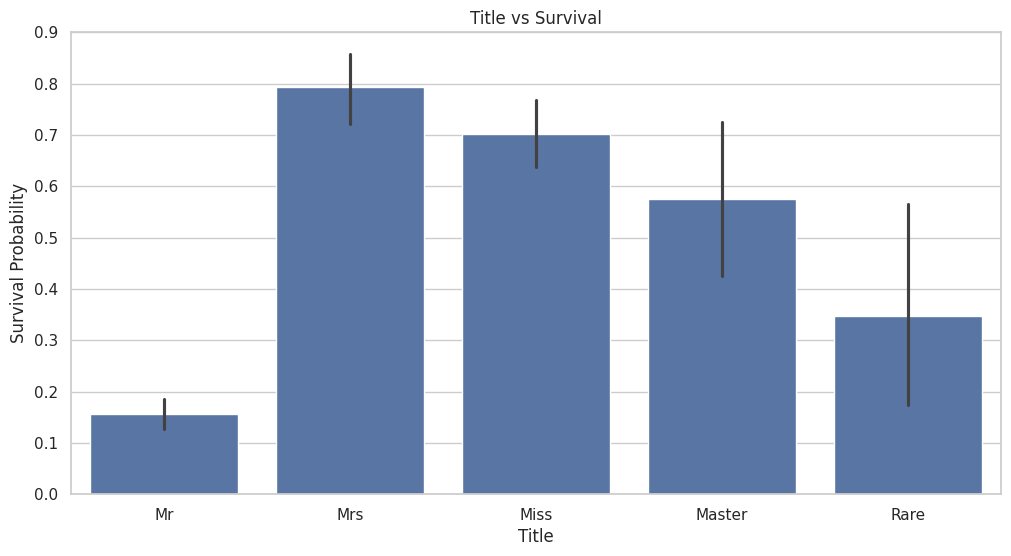

In [36]:
#Simplify the titles by grouping rare ones into a 'Rare' Category
df['Title'] = df['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')

df['Title'] = df['Title'].replace('Mlle','Miss')
df['Title'] = df['Title'].replace('Ms','Miss')
df['Title'] = df['Title'].replace('Mme','Mrs')

plt.figure(figsize=(12,6))
sns.barplot(x = 'Title', y = 'Survived', data = df)
plt.title('Title vs Survival')
plt.ylabel('Survival Probability')
plt.show()

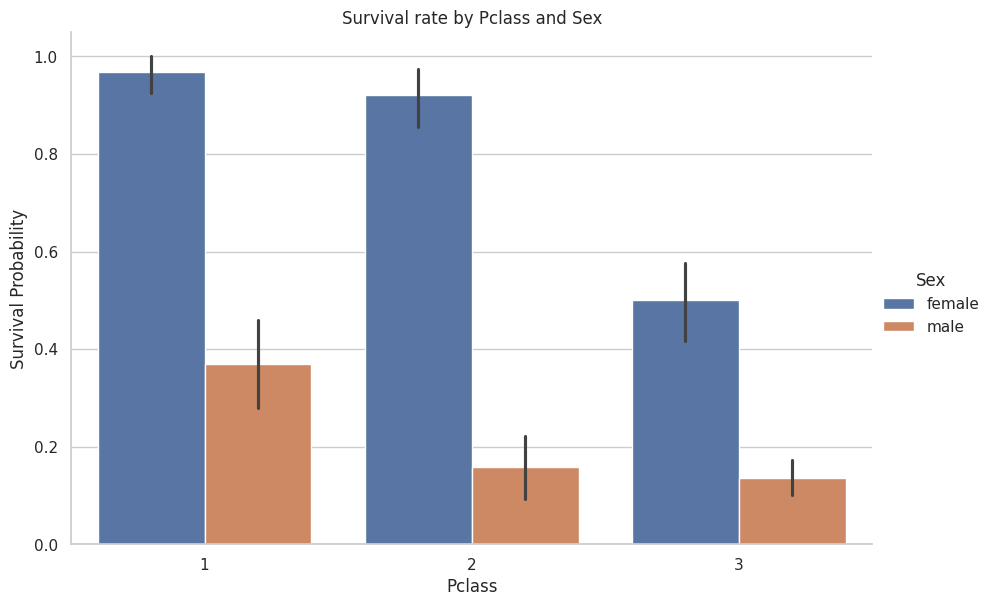

In [37]:
#Survival rate by Pclass and Sex

sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df, kind = 'bar',height=6,aspect=1.5)
plt.title('Survival rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()
#

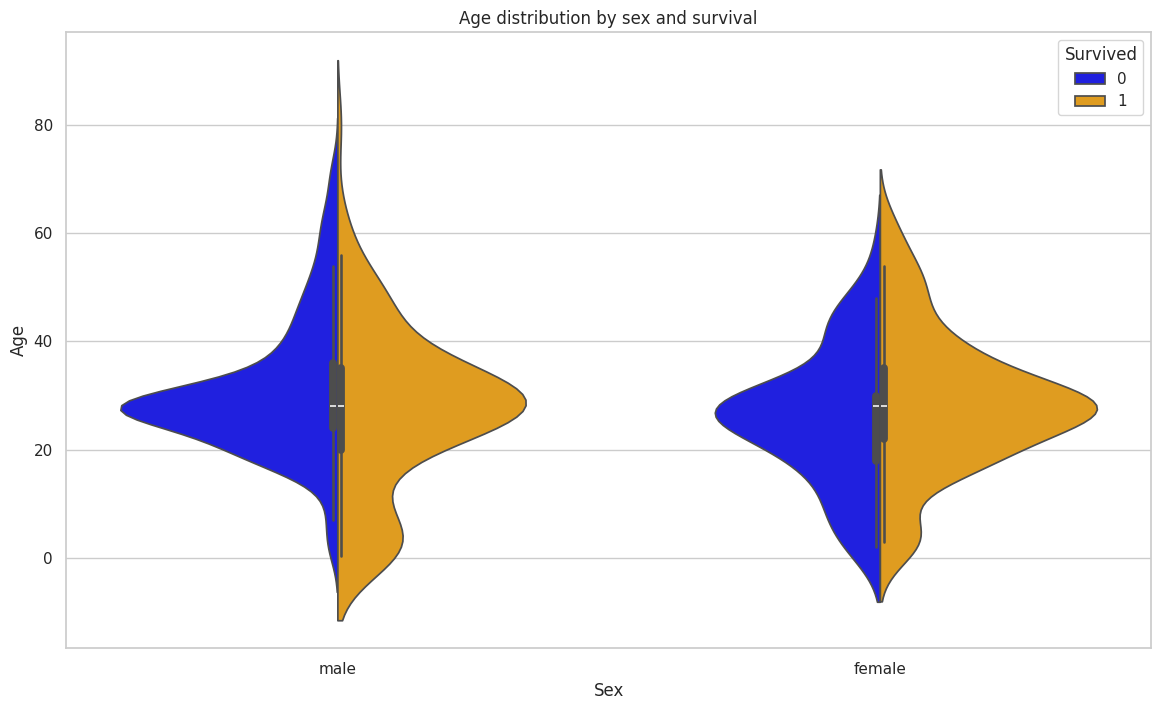

In [38]:
#Violin plot tomsee age distribution by sex and survival states
plt.figure(figsize=(14,8))
sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived', data = df,split=True,palette={0: 'blue',1:'orange'})
plt.title('Age distribution by sex and survival')
plt.show()


CORRELATION ANALYSIS

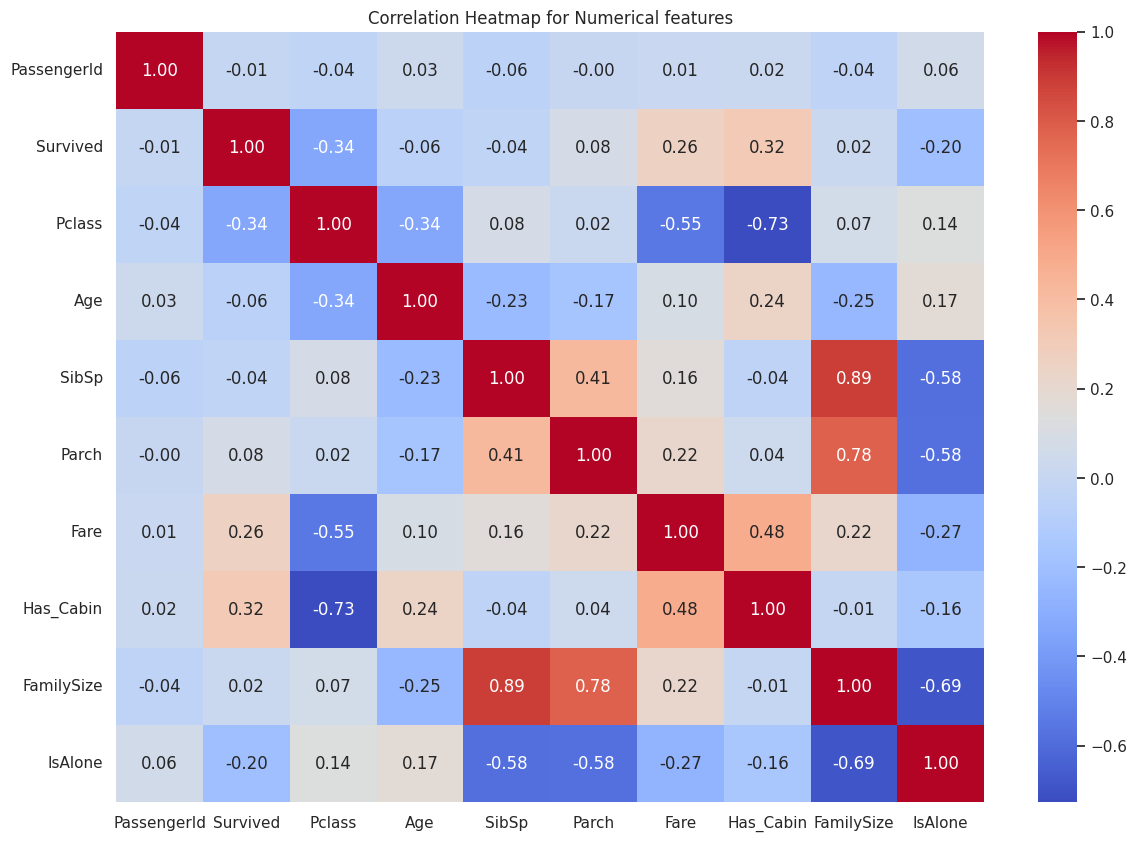

In [39]:
#Correlation Heatmap for Numerical features
plt.figure(figsize = (14,10))
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',fmt = '.2f')
plt.title('Correlation Heatmap for Numerical features')
plt.show()


YDATA PROFILING

In [40]:
# Generate profiling report
profile = ProfileReport(df, title="Titanic Data Profiling Report", explorative=True)

# Display
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 47.27it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
# save as HTML
profile.to_file("Titanic_Survival_Analysis_Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]